For the high frequency amplifier, we need:
- a large bandwidth (at least 200 MHz)
- a high gain
- large SNR
- impedance matched

The MAR8ASM+ works for this application. It has:
- a large bandwidth (25 dB of gain at 1 GHz)
- a high gain (31.5 dB at 100 MHz)
- It gives the figure 3.1 dB at 1 GHz. Assuming this is thermal noise, it is not frequency dependent so this would be the same as the noise at 100 MHz. This is a decently low value. 
- The amplifier is internally matched to 50 ohms.

Using the following recommended application circuit:
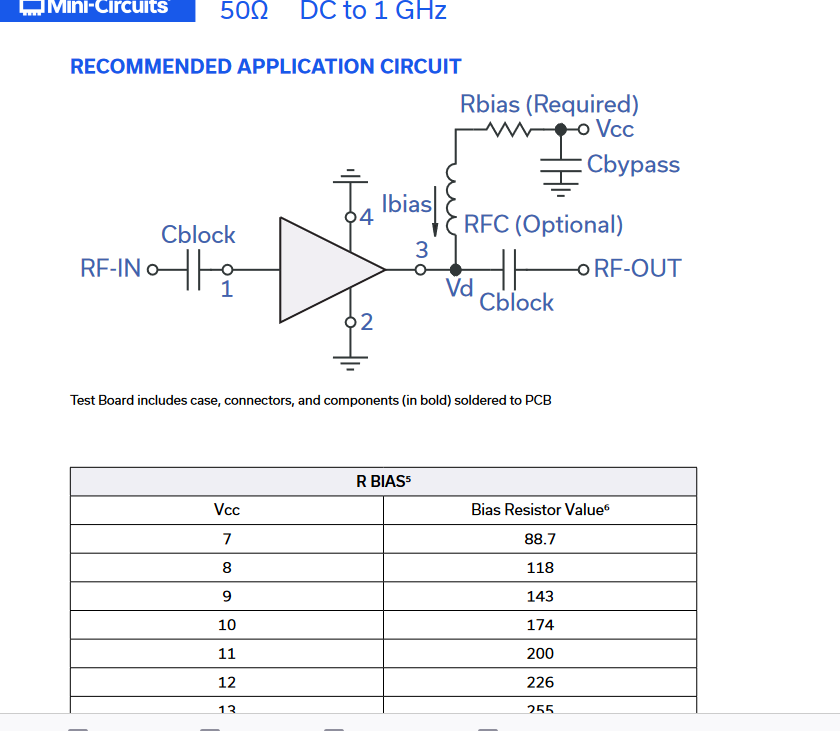

- Assuming that Vd = 3.7V (since that is the supply voltage listed on the datasheet), Rbias dissipates V^2/R = (12-3.7)^2/226 = 0.30482300885 W. This means we can't choose a regular 1/4 watt or 1/10 watt resistor. Choosing this 1W resistor as a FOS of ~3. https://www.digikey.com/en/products/detail/vishay-dale/CRCW2512226RFKEG/1173582
- For Cblock, we want it to block any signal frequencies below 88 MHz. Let's set it to 1uF, which would give us an impedance @ 100 MHz of 1/(j*2*pi*100*10^6*1*10^-6) = -0.0628j which has a magnitude of 0.0628 ohms, an impedance of 1/(j*2*pi*100*1*10^-6) = 62.8 kohms at 100 Hz. 
- Unfortunately, this won't work because I couldn't find any 1 uF capacitors online that would have a self-resonant freq. above 100 MHz. The largest I could find was around 300 pF on Mouser by searching "RF capacitor". This is far too low and will result in a very high impedance at 100 MHz. 
    - Found a 0.1 uF capacitor that has a dip in the S11 curve at 6 GHz, indicating that is the self-resonant freq: https://www.mouser.com/datasheet/2/40/531z-3169645.pdf
    - This also works: https://www.digikey.com/en/product-highlight/a/american-technical-ceramics/550l-ultra-broadband-capacitor
    - Looks like we'll have to go with 0.1 uF. We can add a compensating resistor.
- For the RF choke, we want to block all RF signals @ 100 MHz because if it wasn't there, then the bias resistor would be in parallel with the 50 ohm impedance, causing the overall impedance to be less than 50 ohms. 
- However, we can't just model this as an inductor also have to consider the series RLC circuit formed with the DC blocking cap and the bias res. We want the inductor to be large enough so that the resonant frequencies at least 2 orders of magnitude below 100 MHz. If we choose 10 uH, then we get 76 db = ~6.3k ohms of impedance @ 100 MHz, which is much larger than the 50 ohms. 
- Unfortunately, this won't work because we also can't have the parasitic capacitance of the inductor be too large, otherwise it will allow high freq signals to pass.
    - This means there is a tradeoff between inductor impedance and self-resonant frequency.
- We want the self-resonant frequency to be the 100 MHz to provide a very high impedance. 
- This 10 uH inductor on digikey has a self-resonant freq. of 100 MHz, which is perfect for our application: https://www.digikey.com/en/products/detail/murata-electronics/LQW32FT100M0HL/9559540
- It reduces the impedance from 50 ohms to ~ 49.5 ohms, but we can compensate by adding a 0.5 ohm resistor. The impedance will still vary slightly since the impedance of the inductor varies based on the frequency, which varies from 88 MHz to 108 MHz.
- Todo: add modeling of parasitic caps and sim, add resistor compensation for both inductor and capacitor.